# Exploratory data analysis - Italy

In [27]:
import pandas as pd
import numpy as np
import plotly.express as px
import streamlit as st

In [2]:
demo_data = pd.read_csv('../auxiliary_data/regioni_istat_2020_01.csv').drop(
    ['Tipo di indicatore demografico', 'Sesso', 'Età', 'Flags', 'Seleziona periodo'], axis=1)
demo_data = demo_data[demo_data['Stato civile']=='totale']
demo_data.head(22)

,Territorio,Stato civile,Value
4,Piemonte,totale,4311217
9,Valle d'Aosta / Vallée d'Aoste,totale,125034
14,Liguria,totale,1524826
19,Lombardia,totale,10027602
24,Provincia Autonoma Bolzano / Bozen,totale,532644
29,Provincia Autonoma Trento,totale,545425
34,Veneto,totale,4879133
39,Friuli-Venezia Giulia,totale,1206216
44,Emilia-Romagna,totale,4464119
49,Toscana,totale,3692555


In [3]:
demo_data.at[24,'Territorio'] = 'P.A. Bolzano'
demo_data.at[29,'Territorio'] = 'P.A. Trento'

In [14]:
regional_data = pd.read_csv('../dati-regioni/dpc-covid19-ita-regioni.csv')
regional_data['data'] = pd.to_datetime(regional_data['data'])
regional_data.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,NaN,NaN,0,5,NaN,NaN,NaN,NaN,NaN
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN
3,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,NaN,NaN,0,10,NaN,NaN,NaN,NaN,NaN
4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,NaN,NaN,18,148,NaN,NaN,NaN,NaN,NaN


In [15]:
mapping_regioni = dict(zip(sorted(demo_data.Territorio.unique()),sorted(regional_data.denominazione_regione.unique())))

In [16]:
demo_data['denominazione_regione']=demo_data['Territorio'].map(mapping_regioni)

In [17]:
demo_data.sort_values(by='Territorio').head()

,Territorio,Stato civile,population,denominazione_regione
69,Abruzzo,totale,1293941,Abruzzo
89,Basilicata,totale,553254,Basilicata
94,Calabria,totale,1894110,Calabria
79,Campania,totale,5712143,Campania
44,Emilia-Romagna,totale,4464119,Emilia-Romagna


In [18]:
demo_data.rename(columns={'Value':'population'},inplace=True)

In [19]:
regional_data = regional_data.merge(demo_data,on='denominazione_regione')

In [23]:
regional_data.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi', 'Territorio',
       'Stato civile', 'population', 'terapia_intensiva_su_popolazione',
       'totale_ospedalizzati_su_popolazione', 'nuovi_positivi_su_popolazione',
       'deceduti_su_popolazione', 'tamponi_su_popolazione',
       'ingressi_terapia_intensiva_su_popolazione'],
      dtype='object')

In [28]:
metrics = ('terapia_intensiva','totale_ospedalizzati', 'totale_positivi','nuovi_positivi', 
                'deceduti', 'tamponi','ingressi_terapia_intensiva')

In [ ]:
#HINT add rolling mean

In [28]:
metrics_to_plot = []
for metric in metrics:
    metrics_to_plot.append(metric)
    #over population
    label = metric + '_su_popolazione'
    metrics_to_plot.append(label)
    regional_data[label] = regional_data[metric]/regional_data['population']

In [ ]:
st.title('COVID-19: Italian regional data')

In [ ]:
# Only a subset of options make sense
y_options = sorted(metrics_to_plot)
# Allow use to choose
y_axis = st.sidebar.selectbox('Which metric do you want to explore?', y_options)

In [ ]:
# plot the value
fig = px.line(regional_data,
                x= 'data',
                y= y_axis ,
                hover_name='metric',
                color = 'denominazione_regione'
                title=f'y_axis')

st.plotly_chart(fig)

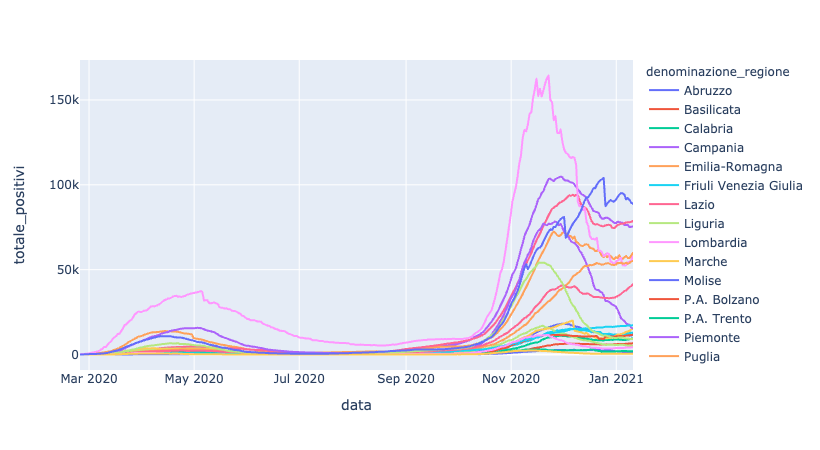

In [26]:
#px.line(regional_data,x='data',y='totale_positivi',color='denominazione_regione')